In [2]:
import pandas as pd
train = pd.read_pickle('./data/train.pkl')
test = pd.read_pickle('./data/test.pkl')
train_preds = pd.read_csv('./data/train_preds.csv')
test_preds = pd.read_csv('./data/test_preds.csv')


In [8]:
# train_preds.index =
train_preds.columns = ['fold_'+str(i) for i in range(10)]
test_preds.columns = ['fold_'+str(i) for i in range(10)]


In [14]:
# train_preds['pressure'] = train['pressure'].values
train_preds['u_out'] = train.u_out.values

In [12]:
# train_preds
from sklearn.metrics import mean_absolute_error as mae

In [24]:
def abs_errors(df,fold):
    print('mean absolute error for fold_'+ str(fold)+' the whole data is :'+str(mae(df.pressure,df['fold_'+str(fold)].values)))
    print('mean absolute error for fold_'+ str(fold)+' for inhale is :'+str(mae(df.loc[df.u_out == 0,'pressure'].values,df.loc[df.u_out == 0,'fold_'+str(fold)].values)))
    print('mean absolute error for fold_'+ str(fold)+' for exhale is :'+str(mae(df.loc[df.u_out == 1,'pressure'].values,df.loc[df.u_out == 1,'fold_'+str(fold)].values)))

In [228]:
for fold in range(10):
    abs_errors(train_preds,fold)

mean absolute error for fold_0 the whole data is :0.14765361494303716
mean absolute error for fold_0 for inhale is :0.15422115434669761
mean absolute error for fold_0 for exhale is :0.1436360197362337
mean absolute error for fold_1 the whole data is :0.12156095820227841
mean absolute error for fold_1 for inhale is :0.11899040334678856
mean absolute error for fold_1 for exhale is :0.1231334571598765
mean absolute error for fold_2 the whole data is :0.22838540709554822
mean absolute error for fold_2 for inhale is :0.2981660308919305
mean absolute error for fold_2 for exhale is :0.18569814136923427
mean absolute error for fold_3 the whole data is :0.14236315375966496
mean absolute error for fold_3 for inhale is :0.14614936533197323
mean absolute error for fold_3 for exhale is :0.14004699476465815
mean absolute error for fold_4 the whole data is :0.13675329622243312
mean absolute error for fold_4 for inhale is :0.13499303134420346
mean absolute error for fold_4 for exhale is :0.13783011225

In [27]:
# for fold in range(10):
#     abs_errors(train_preds,fold)
all_pressure = train.pressure.sort_values().unique()
print('The first 25 unique pressures...')
PRESSURE_MIN = all_pressure[0]
PRESSURE_MAX = all_pressure[-1]
all_pressure[:25]

The first 25 unique pressures...


array([-1.8955, -1.825 , -1.755 , -1.685 , -1.614 , -1.544 , -1.474 ,
       -1.403 , -1.333 , -1.263 , -1.192 , -1.122 , -1.052 , -0.982 ,
       -0.9116, -0.8413, -0.771 , -0.7007, -0.6304, -0.56  , -0.4897,
       -0.4194, -0.349 , -0.2788, -0.2085], dtype=float16)

In [28]:
print('The differences between first 25 pressures...')
PRESSURE_STEP = ( all_pressure[1] - all_pressure[0] )
all_pressure[1:26] - all_pressure[:25]

The differences between first 25 pressures...


array([0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703,
       0.0703, 0.0703, 0.0703, 0.0703, 0.0698, 0.0703, 0.0703, 0.0703,
       0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703, 0.0703,
       0.0703], dtype=float16)

In [37]:
import numpy as np


(6036000,)

In [38]:
# Mean pressure
train_preds["pressure_mean"] = train_preds[train_preds.columns[:-2]].mean(axis = 1)
# ENSEMBLE FOLDS WITH MEDIAN
train_preds["pressure_mode"] = np.median((train_preds[train_preds.columns[:-2]].values),axis=1)
# submission.to_csv('submission_median_LB155.csv', index=False)

# ENSEMBLE FOLDS WITH MEDIAN AND ROUND PREDICTIONS
train_preds["pressure_round"] =\
    np.round( (train_preds.pressure_mode - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
train_preds.pressure_round = np.clip(train_preds.pressure_round, PRESSURE_MIN, PRESSURE_MAX)
# submission.to_csv('submission_median_round_LB153.csv', index=False)

In [39]:
train_preds

,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,pressure,u_out,pressure_mean,pressure_mode,pressure_round
0,5.891101,5.838648,5.684250,5.948707,5.743800,5.824937,5.795985,5.883726,5.837443,5.787233,5.835938,0,5.823583,5.835938,5.838867
1,5.939713,5.886334,5.799267,5.921318,5.837879,5.873787,5.790929,5.945686,5.910221,5.882521,5.906250,0,5.878766,5.886334,5.909180
2,7.930501,7.906216,7.948879,8.041368,7.932002,8.048054,7.942029,8.047990,7.920726,7.877745,7.875000,0,7.959551,7.932002,7.948242
3,11.736100,11.718106,11.740012,11.844011,11.839354,11.750312,11.894711,11.900454,11.711008,11.702016,11.742188,0,11.783608,11.742188,11.745117
4,12.460131,12.303432,12.643372,12.517777,12.461752,12.620625,12.407640,12.539241,12.451701,12.431172,12.234375,0,12.483684,12.460131,12.448242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,3.868810,3.898138,3.850833,3.911195,3.799975,3.900202,3.925530,3.858071,3.903248,3.806716,3.869141,1,3.872272,3.869141,3.870117
6035996,3.863165,3.901766,3.872842,3.937112,3.827257,3.939220,3.925679,3.876381,3.927551,3.821079,3.869141,1,3.889205,3.876381,3.870117
6035997,3.772086,3.841298,3.789844,3.863722,3.749590,3.837630,3.860522,3.769539,3.850655,3.722297,3.798828,1,3.805718,3.798828,3.799805
6035998,4.034785,4.113285,4.153957,4.184475,4.060887,4.094110,4.124851,4.060626,4.194100,4.015962,4.078125,1,4.103704,4.094110,4.081055


In [40]:
print('mean absolute error  the whole data is :'+str(mae(train_preds.pressure,train_preds.pressure_mean.values)))
print('mean absolute error  for inhale is :'+str(mae(train_preds.loc[train_preds.u_out == 0,'pressure'].values,train_preds.loc[train_preds.u_out == 0,'pressure_mean'].values)))
print('mean absolute error  for exhale is :'+str(mae(train_preds.loc[train_preds.u_out == 1,'pressure'].values,train_preds.loc[train_preds.u_out == 1,'pressure_mean'].values)))

mean absolute error  the whole data is :0.12687261404158912
mean absolute error  for inhale is :0.12162685250662289
mean absolute error  for exhale is :0.13008163116406982


In [41]:
print('mean absolute error  the whole data is :'+str(mae(train_preds.pressure,train_preds.pressure_mode.values)))
print('mean absolute error  for inhale is :'+str(mae(train_preds.loc[train_preds.u_out == 0,'pressure'].values,train_preds.loc[train_preds.u_out == 0,'pressure_mode'].values)))
print('mean absolute error  for exhale is :'+str(mae(train_preds.loc[train_preds.u_out == 1,'pressure'].values,train_preds.loc[train_preds.u_out == 1,'pressure_mode'].values)))

mean absolute error  the whole data is :0.10976987894763571
mean absolute error  for inhale is :0.09387963678348081
mean absolute error  for exhale is :0.11949049984228478


In [42]:
print('mean absolute error  the whole data is :'+str(mae(train_preds.pressure,train_preds.pressure_round.values)))
print('mean absolute error  for inhale is :'+str(mae(train_preds.loc[train_preds.u_out == 0,'pressure'].values,train_preds.loc[train_preds.u_out == 0,'pressure_round'].values)))
print('mean absolute error  for exhale is :'+str(mae(train_preds.loc[train_preds.u_out == 1,'pressure'].values,train_preds.loc[train_preds.u_out == 1,'pressure_round'].values)))

mean absolute error  the whole data is :0.10917885487817469
mean absolute error  for inhale is :0.0934921950359423
mean absolute error  for exhale is :0.11877493729494429


In [230]:
test_preds1 = test_preds.copy()

In [231]:
test_preds1.drop(['pressure_mean','pressure_round','pressure_mode','fold_2'],axis = 1,inplace = True)

In [232]:
test_preds["pressure_mean"] = test_preds.mean(axis = 1)
# ENSEMBLE FOLDS WITH MEDIAN
test_preds["pressure_mode"] = np.median(test_preds.values,axis=1)
# submission.to_csv('submission_median_LB155.csv', index=False)

# ENSEMBLE FOLDS WITH MEDIAN AND ROUND PREDICTIONS
test_preds["pressure_round"] =\
    np.round( (test_preds.pressure_mode - PRESSURE_MIN)/PRESSURE_STEP ) * PRESSURE_STEP + PRESSURE_MIN
test_preds.pressure_round = np.clip(test_preds.pressure_round, PRESSURE_MIN, PRESSURE_MAX)

In [233]:
# np.median(test_preds.values,axis=1).shape
test_preds['id'] = test['id']

In [234]:
test_mean = test_preds[['id','pressure_mean']]
test_mean.columns = ['id','pressure']
test_mean.to_csv('mean_submission.csv',index = False)

In [235]:
# test_median = test_preds[['id','pressure_mode']]
# test_median.columns = ['id','pressure']
# test_median.to_csv('median_submission.csv',index = False)
# test_median
test_round = test_preds[['id','pressure_round']]
test_round.columns = ['id','pressure']
test_round.to_csv('round_submission.csv',index = False)
# test_round
# sub_best = pd.read_csv('.\data\submission_clipped.csv')

In [67]:
sub_best['id'] = sub_best['id']%80
sub_best.loc[sub_best['id']==0,'id'] = 80

In [69]:
train = pd.read_pickle('./data/train.pkl')
train['id'] = train['id']%80
train.loc[train['id']==0,'id'] = 80

In [70]:
p = train.pivot(columns = 'id',index = 'breath_id',values = 'pressure')

In [75]:
sub_best['breath_id'] = test.breath_id.values

In [104]:
p_test = sub_best.pivot(columns = 'id',index = 'breath_id',values = 'pressure')

In [107]:
p[2].sort_values().diff().fillna(0).unique()
# np.median(p[2].sort_values().diff().fillna(0))
# p

array([0.     , 0.0703 , 0.2812 , 0.0698 , 0.2109 , 0.1406 , 0.06836],
      dtype=float16)

In [106]:
p_test[2].sort_values().diff().fillna(0).unique()

array([0.        , 0.21090644, 0.07030215, 0.07030215, 0.42181287,
       0.14060429, 0.14060429, 0.07030215, 0.07030215, 0.14060429,
       0.07030215, 0.07030215, 0.07030215, 0.07030215, 0.07030215,
       0.07030215, 0.07030215, 0.07030215, 0.07030215, 0.07030215,
       0.07030215])

In [143]:
# train

,id,breath_id,time_step,u_in,u_out,pressure,area,cross,cross2,u_in_cumsum,...,C_50,RC_2010,RC_2020,RC_2050,RC_5010,RC_5020,RC_5050,RC_510,RC_520,RC_550
0,1,1,0.000000,0.083313,0,5.835938,0.000000,0.000000,0.000000,0.083313,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0.033661,18.390625,0,5.906250,0.618652,0.000000,0.000000,18.468750,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,0.067505,22.515625,0,7.875000,2.138672,0.000000,0.000000,40.968750,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,0.101562,22.812500,0,11.742188,4.453125,0.000000,0.000000,63.781250,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,0.135742,25.359375,0,12.234375,7.898438,0.000000,0.000000,89.125000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,76,125749,2.503906,1.489258,1,3.869141,270.000000,1.489258,2.503906,387.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6035996,77,125749,2.537109,1.488281,1,3.869141,273.750000,1.488281,2.537109,388.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6035997,78,125749,2.572266,1.558594,1,3.798828,278.000000,1.558594,2.572266,390.250000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6035998,79,125749,2.605469,1.272461,1,4.078125,281.250000,1.272461,2.605469,391.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

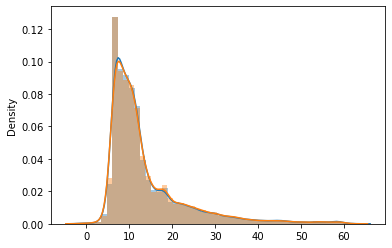

In [149]:
# import seaborn as sns
i = 5
import matplotlib.pyplot as plt
sns.distplot(train.loc[(train.u_out == 0) & (train.id == i),'pressure'].sort_values().values)
sns.distplot(sub_best.loc[(sub_best.u_out == 0) & (sub_best.id == i),'pressure'].sort_values().values)
# sub_best['u_in'] = test.u_in.values
# sub_best['u_out'] = test.u_out.values

In [175]:
# p_t[list(range(1,33))].describe()
# p[5].unique().shape[0]/p_t[5].unique().shape[0]
# for i in range(1,34):
#     print(p[i].unique().shape[0]/p_t[i].unique().shape[0])
p.loc[p[1] == p[1].unique()[0],4].unique().shape[0]/p[4].unique().shape[0]


0.49032258064516127

In [204]:

# train.loc[train.id == 1,'u_in'].unique().shape
# plt.plot(p[2].sort_values().unique())
# plt.plot(p_t[2].sort_values().unique())
# train
# p.iloc[abs(p[1]-p_t.loc[0,1]).argmin(),1]
abs(p_t.loc[0,1]-p[1]).min()

0.01563

In [208]:
# len(p_t)
p_t

id,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
breath_id,,,,,,,,,,,,,,,,,,,,,
0,6.271815,5.939655,7.160642,7.607888,9.119616,10.309126,11.554458,12.715960,13.958588,15.066360,...,6.289439,6.250920,6.292781,6.225816,6.322594,6.224748,6.329027,6.221857,6.309257,6.232068
8,6.055755,7.117607,6.693028,7.776184,7.045692,8.370633,7.300622,8.779261,7.619607,9.132151,...,6.217418,6.182453,6.236894,6.220203,6.203478,6.234487,6.219895,6.222463,6.256094,6.239037
11,6.483490,10.005805,14.645315,21.030281,23.266674,21.889906,17.447292,14.287000,14.382092,14.845792,...,6.574828,6.419484,6.409460,6.520263,6.647029,6.554960,6.392030,6.405656,6.542313,6.629688
24,3.530891,3.552324,4.196576,5.440664,7.032836,8.695281,10.542369,12.014054,13.746181,15.337568,...,4.561759,4.632932,4.560964,4.496187,4.497621,4.214665,4.213380,4.068162,4.068348,3.931773
31,6.276954,12.738298,18.444070,18.163456,14.027275,17.141478,19.301502,14.273143,15.196783,20.268158,...,6.746288,6.435191,6.410252,6.637936,6.348890,6.416515,6.523531,6.280324,6.458451,6.426505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125741,6.120352,7.773279,13.515482,17.508870,20.331827,23.036991,25.385601,27.559208,29.525726,30.897167,...,6.093536,6.286913,6.223370,6.224239,6.350404,6.120647,6.154641,6.275679,6.144807,6.268046
125744,6.408469,5.867889,6.257729,6.322696,6.352771,6.353757,6.356706,6.511539,6.529326,6.448328,...,6.409651,6.415925,6.400363,6.381730,6.380959,6.394788,6.403781,6.398454,6.372670,6.409709
125746,5.572957,6.647337,13.805840,32.183044,33.554930,21.192790,16.039513,24.597994,31.284094,23.099747,...,6.531803,6.682064,6.755427,6.427505,6.605406,6.646567,6.446250,6.448181,6.498561,6.479391


In [223]:
# p_t
# abs(p[1]-p_t.loc[0,1]).min()
# p.index
# abs(p_t.loc[0,1]-p[1])
from tqdm import tqdm
for i in tqdm(range(40)):
    for j in range(len(p_t)):
        p_t.iloc[j,i] = p.iloc[abs(p[i+1]-p_t.iloc[j,i]).argmin(),i]

100%|███████████████████████████████████████████████████████████████████████████████| 40/40 [1:29:17<00:00, 133.94s/it]


In [217]:
# sub_un = pd.read_csv('.\data\submission (7).csv')
# new_
new_test = test[['id']]
new_test['pressure'] = p_test.values.reshape(-1,1)

C:\Users\amakr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [219]:
new_test.to_csv('cropped_submission.csv',index = False)

In [227]:
# sub_un['id'] = sub_un['id']%80
# sub_un.loc[sub_un['id']==0,'id'] = 80
# sub_un['breath_id'] = test.breath_id.values
# (p_test[1].unique().shape)
(p_t[range(1,40)] == p_t[range(1,40)]).sum(axis = 0)

id
1     50300
2     50300
3     50300
4     50300
5     50300
6     50300
7     50300
8     50300
9     50300
10    50300
11    50300
12    50300
13    50300
14    50300
15    50300
16    50300
17    50300
18    50300
19    50300
20    50300
21    50300
22    50300
23    50300
24    50300
25    50300
26    50300
27    50300
28    50300
29    50300
30    50300
31    50300
32    50300
33    50300
34    50300
35    50300
36    50300
37    50300
38    50300
39    50300
dtype: int64

In [117]:
p_t = sub_un.pivot(columns = 'id',index = 'breath_id',values = 'pressure')

<AxesSubplot:ylabel='Count'>

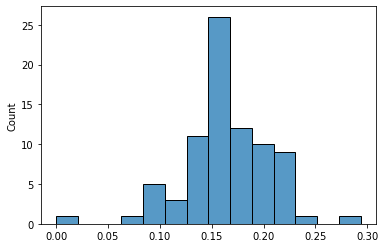

In [222]:
sns.histplot(p_t.min()-p.min())

In [229]:
test_preds

,fold_0,fold_1,fold_2,fold_3,fold_4,fold_5,fold_6,fold_7,fold_8,fold_9,pressure_mean,pressure_mode,pressure_round,id
0,6.242803,6.266972,6.076676,6.207602,6.304314,6.185818,6.304847,6.320824,6.277376,6.312922,6.250015,6.266972,6.260742,1
1,5.963787,5.918267,5.841382,5.867409,5.922467,5.714192,5.983600,5.977334,6.042134,5.979257,5.920983,5.922467,5.909180,2
2,7.111870,7.165590,6.853106,7.090581,7.078024,6.915837,7.038473,7.216608,7.153670,7.121937,7.074570,7.090581,7.104492,3
3,7.632014,7.682669,7.500407,7.476312,7.586238,7.444604,7.477642,7.743791,7.538810,7.598441,7.568093,7.568093,7.596680,4
4,9.075286,9.131856,9.087884,8.989312,9.082811,8.928391,9.016743,9.144970,9.018274,9.073051,9.054858,9.073051,9.073242,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4023995,6.131597,6.134993,6.138223,6.094795,6.130113,6.191986,6.156505,6.158591,6.164641,6.179555,6.148100,6.148100,6.120117,4023996
4023996,6.366548,6.314103,6.332489,6.319313,6.289188,6.353710,6.319170,6.367724,6.356470,6.350178,6.336889,6.336889,6.331055,4023997
4023997,6.164388,6.355158,6.199532,6.200997,6.302304,6.289713,6.314462,6.259468,6.266577,6.158242,6.251084,6.259468,6.260742,4023998
4023998,6.151177,6.141562,6.178930,6.139062,6.136006,6.227804,6.155105,6.173468,6.198319,6.205769,6.170720,6.170720,6.190430,4023999
